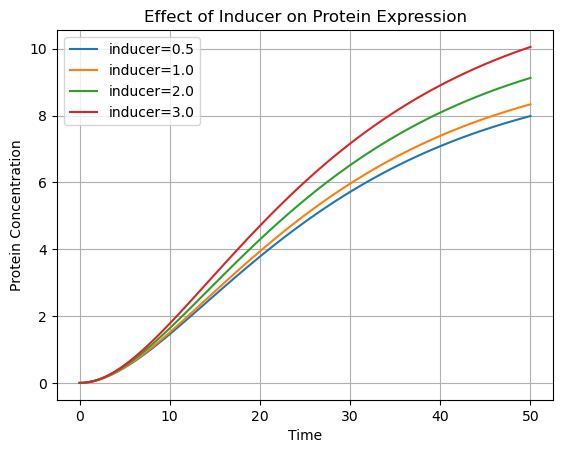

<Figure size 640x480 with 0 Axes>

In [ ]:
import tellurium as te
import matplotlib.pyplot as plt

r = te.loada("""
model inducible_gene_expression
// Species
species dna,mrna,protein,repressor,inducer,complex;
// Parameters
k_tx = 0.5; //transcription rate
k_tl = 1.0; //tranlation rate
k_deg_m = 0.1; //mrna degradation rate
k_deg_p = 0.05; //protein degradation rate
k_bind = 1.0; //repressor binding to dna
k_unbind = 0.1; //unbinding rate
k_on = 0.1; //inducer-repressor binding
k_off = 0.1; //complex dissociation
//Initial concentrations
dna=1;
mrna=0;
protein=0;
repressor=10;
inducer=5;
complex=0;
//Reactions
inducer + repressor -> complex; k_on*inducer*repressor;
complex -> inducer + repressor; k_off*complex;
//Transcrioption (repressed by free repressors)
J1: -> mrna; k_tx*dna/(1+repressor);
//Tranlation
J2: -> protein; k_tl*mrna;
//Degradation
J3: mrna -> ; k_deg_m*mrna;
J4: protein -> ; k_deg_p*protein;
end
""")

inducer_values = [0.5, 1.0, 2.0, 3.0]
colors = ['b', 'g', 'r', 'k']


for i, val in enumerate(inducer_values):
    r.reset()
    r.inducer=val
    result = r.simulate(0, 50, 100)
    plt.plot(result[:,0], result[:,3], label=f'inducer={val}')

plt.xlabel("Time")
plt.ylabel("Protein Concentration")
plt.title("Effect of Inducer on Protein Expression")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('inducer_effect_on_protein.png', dpi=300) 